<h2>Importing the libraries</h2>

In [1]:
#!pip3 install nltk

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Exploratory Data Analysis(EDA)</h2>

In [3]:
#import DataFrame
df = pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<h4>Removing Unwanted Columns</h4>

In [4]:
df = df.iloc[:,:2]

<h4>Renaming Columns</h4>

In [5]:
df = df.rename(columns={"v1":"label","v2":"text"})
df 

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<h4>Total count of spam and ham emails in the dataset</h4>

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<h4>Plotting the count of ham and spam</h4>

In [7]:
import matplotlib.pyplot as plt

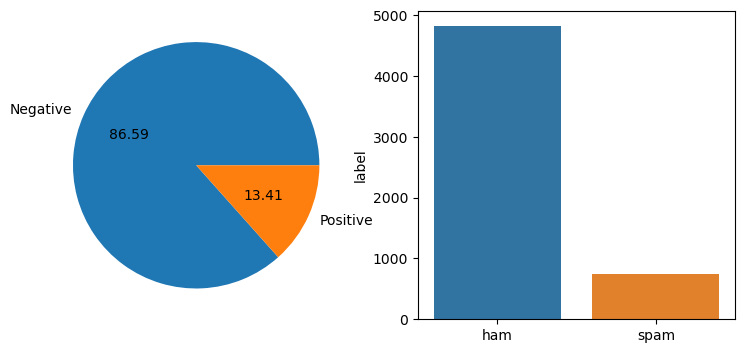

In [8]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['label'].value_counts(),labels = ['Negative','Positive'],autopct = "%0.2f")
plt.subplot(1,2,2)
sns.barplot(x = df['label'].value_counts().index,y = df['label'].value_counts(),data=df)
plt.show()

<h3><i>Conclusion:</i></h3>

We can infer that the dataset is imbalanced. Thus, we first process the dataset

<h4>More information about the dataset</h4>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<h4>Shape of the dataset</h4>

In [10]:
df.shape

(5572, 2)

<h4>Checking for null values</h4>

In [11]:
df.isnull().sum()

label    0
text     0
dtype: int64

<h4>Percentage of ham and spam in dataset with non null values</h4>

In [12]:
df['label'].value_counts()/df.shape[0]*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

<h3>Feature Engineering (Development of New Data from Raw Data)</h3>

We extract certain important information from the dataset such as

<ol>
    <li>Total No. of Characters</li>
    <li>Total No. of Words</li>
    <li>Total No. of Sentences</li>
</ol>

<h4>1. Total Number of Characters</h4>

In [13]:
df['num_char'] = df['text'].apply(len)

<h4>2. Total Number of Words </h4>

In [14]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [15]:
#import nltk
#nltk.download('punkt')

<h4>3. Total Number of Sentences</h4>

In [16]:
df['num_sen'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
#nltk.download('punkt')

In [18]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


#### Statistical Information about the entire dataset

In [19]:
df.describe()

,num_char,num_words,num_sen
count,5572.000000,5572.000000,5572.000000
mean,80.118808,15.494436,1.970747
std,59.690841,11.329427,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,61.000000,12.000000,1.000000
75%,121.000000,23.000000,2.000000
max,910.000000,171.000000,28.000000


#### Statistical Information about data labelled ham

In [20]:
df[df['label'] == 'ham'].describe()

,num_char,num_words,num_sen
count,4825.000000,4825.000000,4825.000000
mean,71.023627,14.200622,1.808705
std,58.016023,11.424511,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,92.000000,19.000000,2.000000
max,910.000000,171.000000,28.000000


#### Statistical Information about data labelled spam

In [21]:
df[df['label'] == 'spam'].describe()

,num_char,num_words,num_sen
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,3.017403
std,29.183082,5.811898,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,8.000000


<h4>Histogram Plot for Spam and Ham</h4>

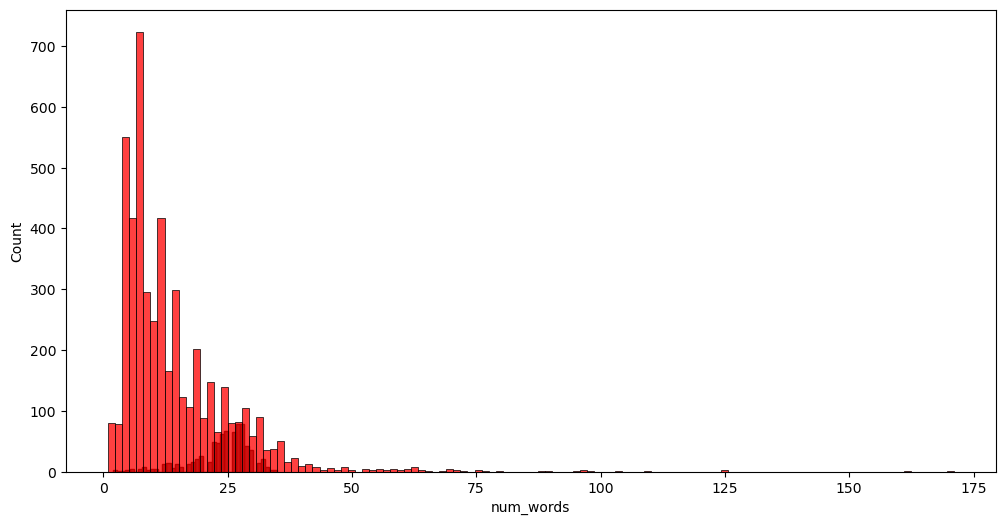

In [22]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 'spam']['num_words'],color = 'black',bins = 40)
sns.histplot(df[df['label'] == 'ham']['num_words'],color = 'red')
plt.show()

<h4>Histogram Plot for Ham</h4>

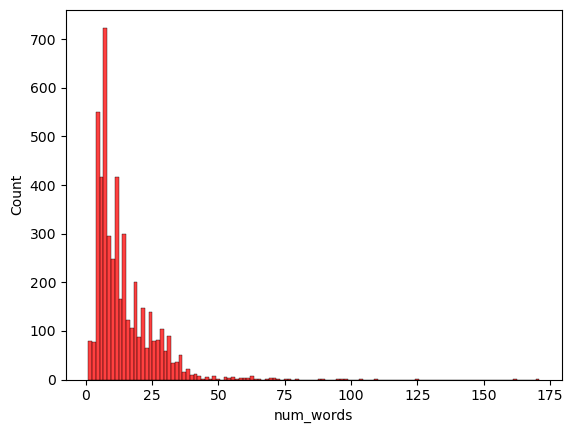

In [23]:
sns.histplot(df[df['label'] == 'ham']['num_words'],color = 'red');

<h4>Histogram Plot for Spam</h4>

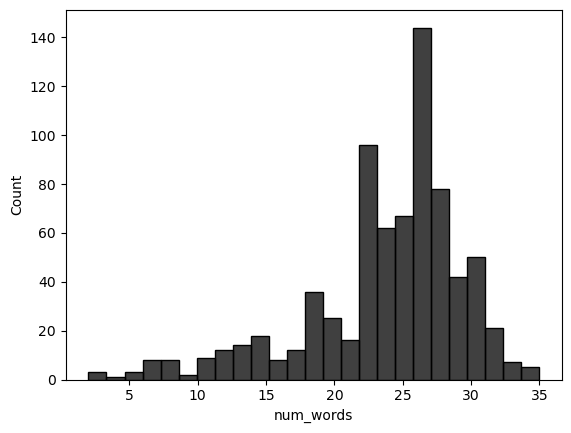

In [24]:
sns.histplot(df[df['label'] == 'spam']['num_words'],color = 'black');

<h4>Pairplot for better visualization</h4>

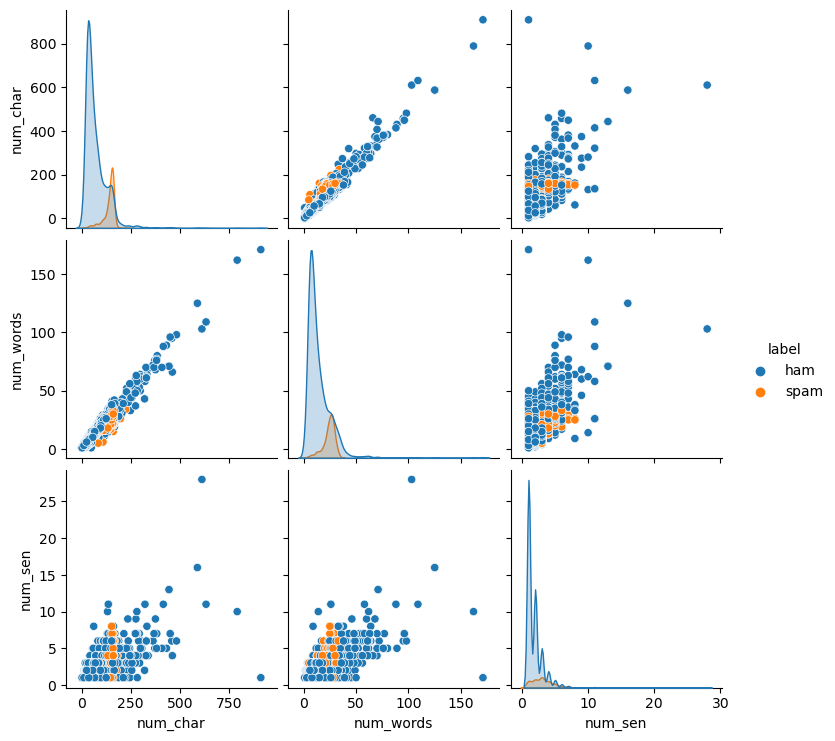

In [25]:
sns.pairplot(df,hue = 'label')
plt.show()

<h3>Handling Outliers</h3>

In [26]:
i = df[df['num_char'] > 500].index
df.drop(i,axis=0,inplace=True)

In [27]:
df = df.reset_index()
df.drop("index",inplace=True,axis=1)

In [28]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5561,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5562,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5563,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5564,ham,The guy did some bitching but I acted like i'd...,125,26,1


<h4>Pairplot after removing emails with more than 500 characters</h4>

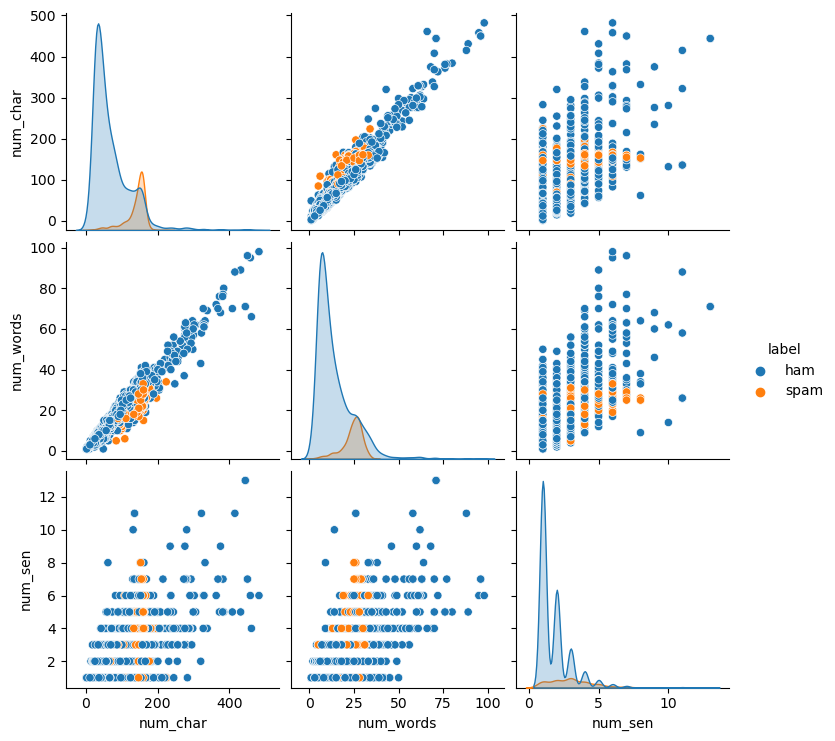

In [29]:
sns.pairplot(df,hue = 'label')
plt.show()

<h4>HeatMap</h4>

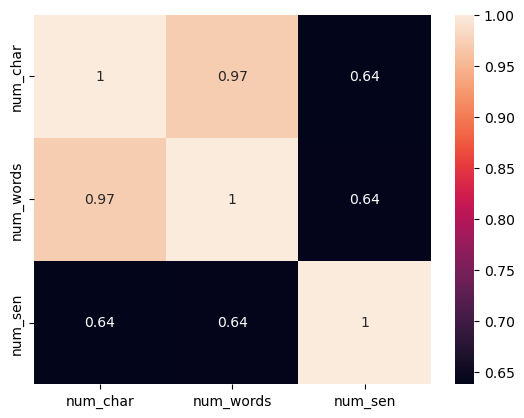

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<h2>Data Preprocessing</h2>

<h3>Importing necessary modules for text processing</h3>

In [31]:
from nltk.corpus import stopwords

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
#nltk.download('stopwords')

In [34]:
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time

In [35]:
#!pip install wordcloud

In [36]:
#conda install -c https://conda.anaconda.org/conda-forge wordcloud

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<h3>Cleaning/Handling Text Data</h3>

<ol>
    <li>Remove Web Links</li>
    <li>Remove Numbers</li>
    <li>Remove Emails</li>
</ol>

<h4>User Defined Functions For Text Processing (Using Regex)</h4>

In [38]:
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

<h4>Calling the above functions</h4>

In [39]:
df['text'] = df['text'].apply(remove_website_links)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_emails)

<h3>Creating functions to clean/process data</h3>

<ol>
    <li>Lower casing to avoid duplicates</li>
    <li>Tokenization of sentences</li>
    <li>Removing Special Characters</li>
    <li>Removing stopwords</li>
    <li>Removing punctuations</li>
    <li>Stemming</li>
</ol>

#### Create Function To Transform Text

In [40]:
def transform_text(text):
    #1. Lower casing
    text = text.lower()
    
    #2. Tokenization
    lst = nltk.word_tokenize(text)
    
    #3.Removing special characters, stopwords and punctuation
    l1 = []
    useless_words = stopwords.words('english') + list(string.punctuation)
    for word in lst:
        if word.isalnum() == True and word not in useless_words:
            l1.append(word)
            
    #4.Stemming        
    l2 = []
    for word in l1:
        ps = PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()

#### Calling the above function

In [41]:
df['text'] = df['text'].apply(transform_text)
df['num_words_transform'] = df['text'].apply(lambda x: len(str(x).split()))

In [42]:
df

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7
...,...,...,...,...,...,...
5561,spam,2nd time tri 2 contact u pound prize 2 claim e...,161,30,4,17
5562,ham,b go esplanad fr home,37,8,1,5
5563,ham,piti mood suggest,57,10,2,3
5564,ham,guy bitch act like interest buy someth els nex...,125,26,1,13


<h2> Data Visualization </h2>

<h3>Most commonly used words for Spam Text</h3>

In [43]:
from wordcloud import WordCloud

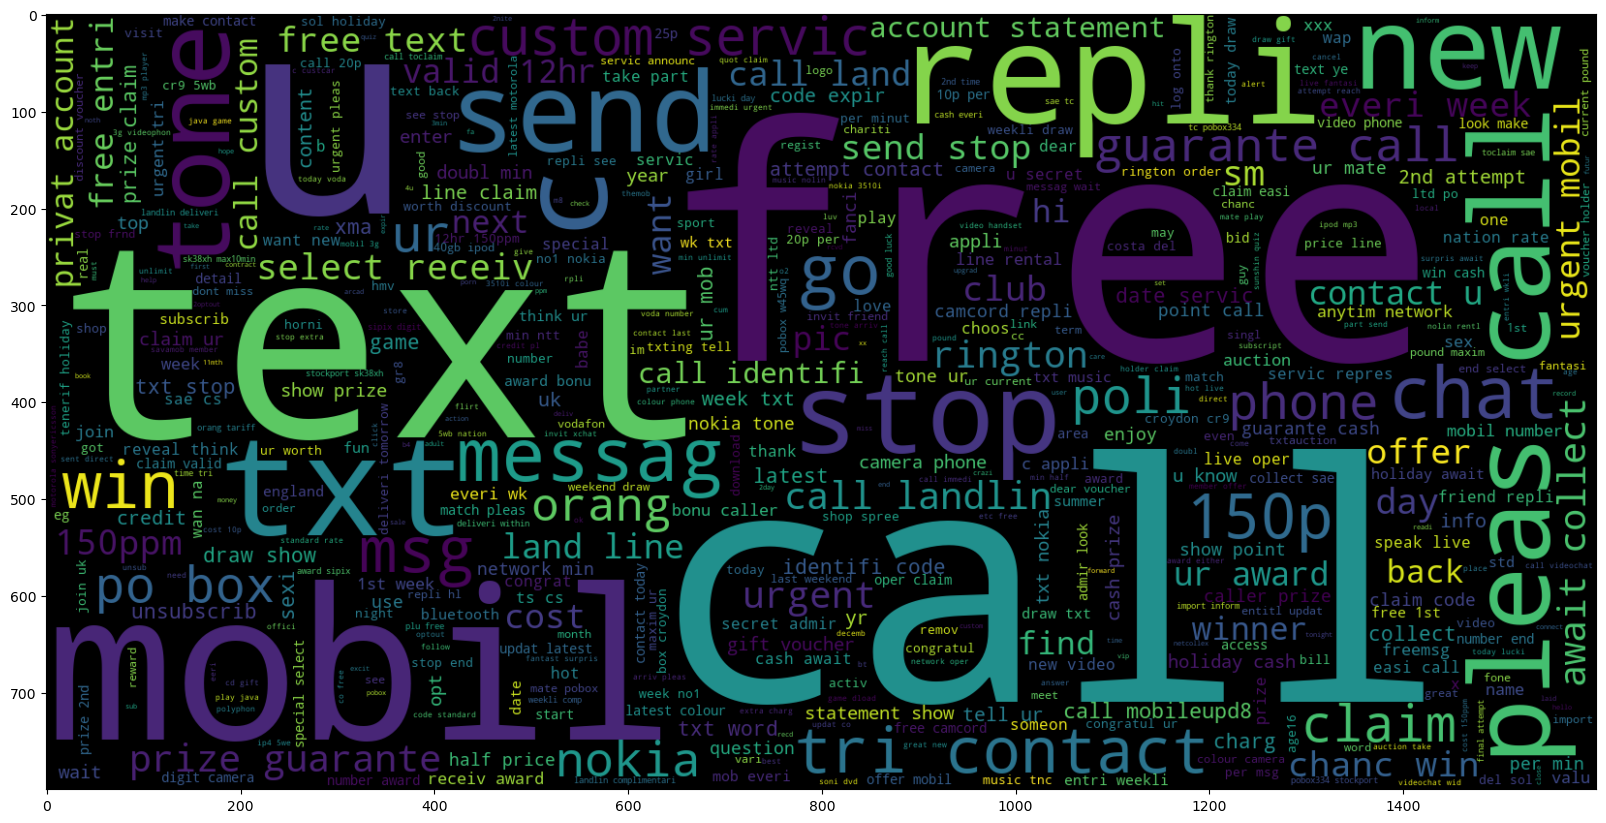

In [44]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(df[df.label == 'spam'].text))
plt.imshow(wc , interpolation = 'bilinear');

<h3>Most commonly used words for Ham Text</h3>

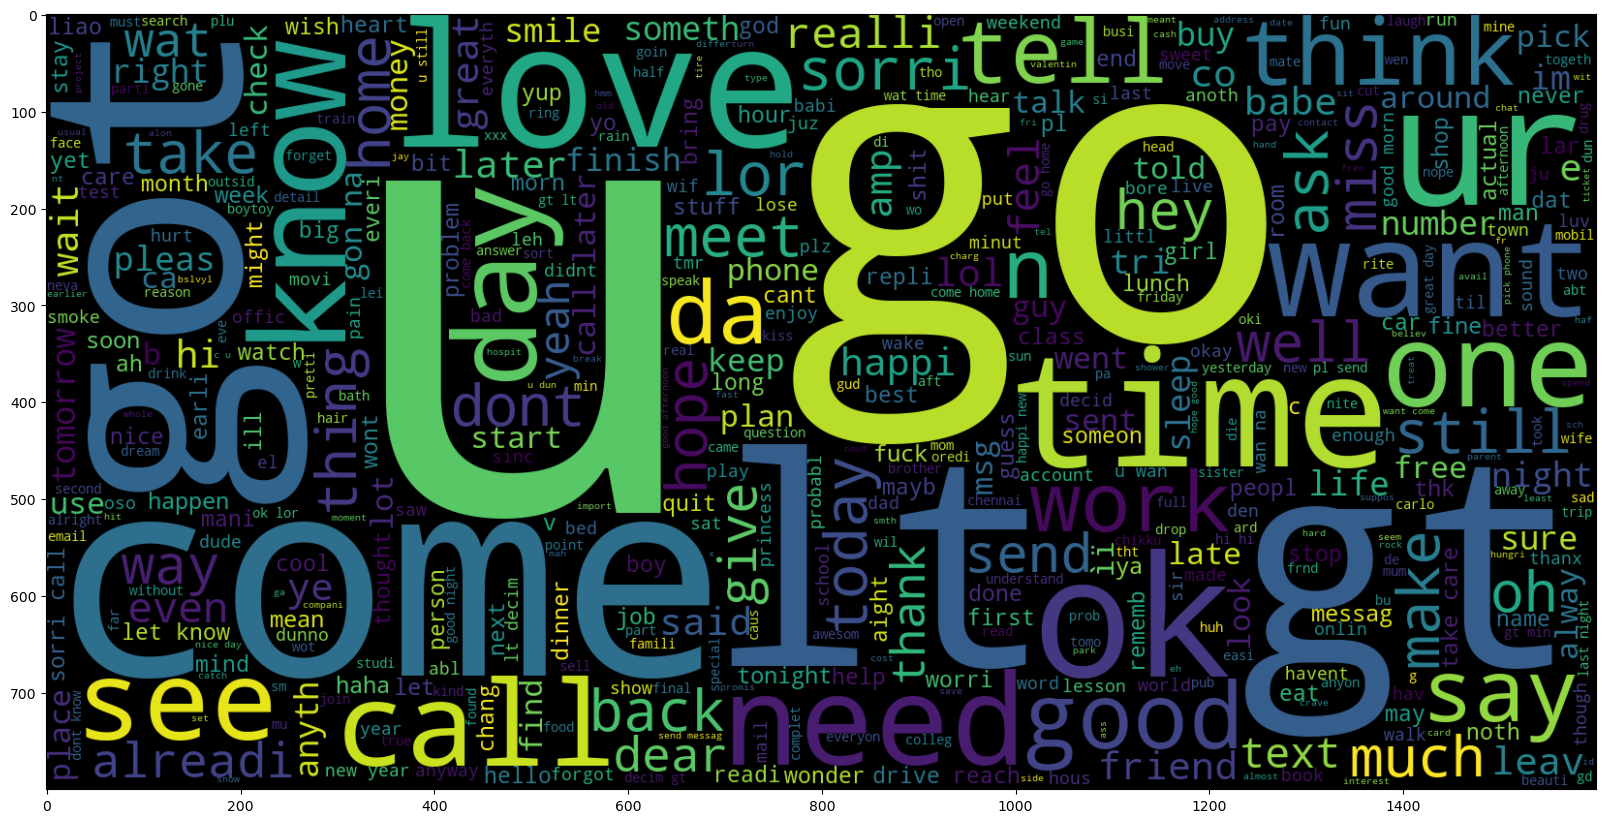

In [45]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500).generate(" ".join(df[df.label == 'ham'].text))
plt.imshow(wc , interpolation = 'bilinear');

In [46]:
df.head()

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7


<h4>Labelling the dataset</h4>

In [47]:
df['label'] = df['label'].replace({'spam':0,'ham':1})

#### Ham Words

In [48]:
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
from collections import Counter

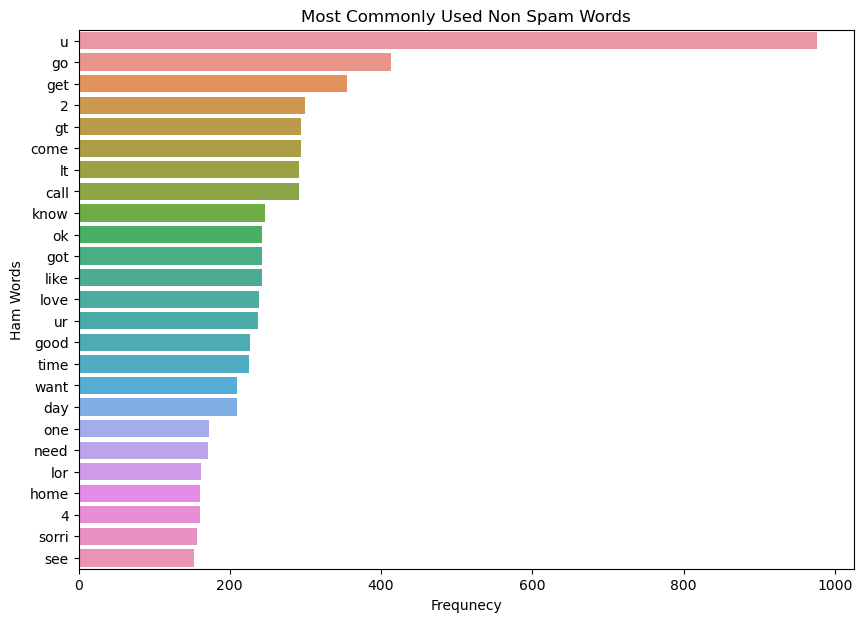

In [50]:
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

#### For Spam Words

In [51]:
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
from collections import Counter

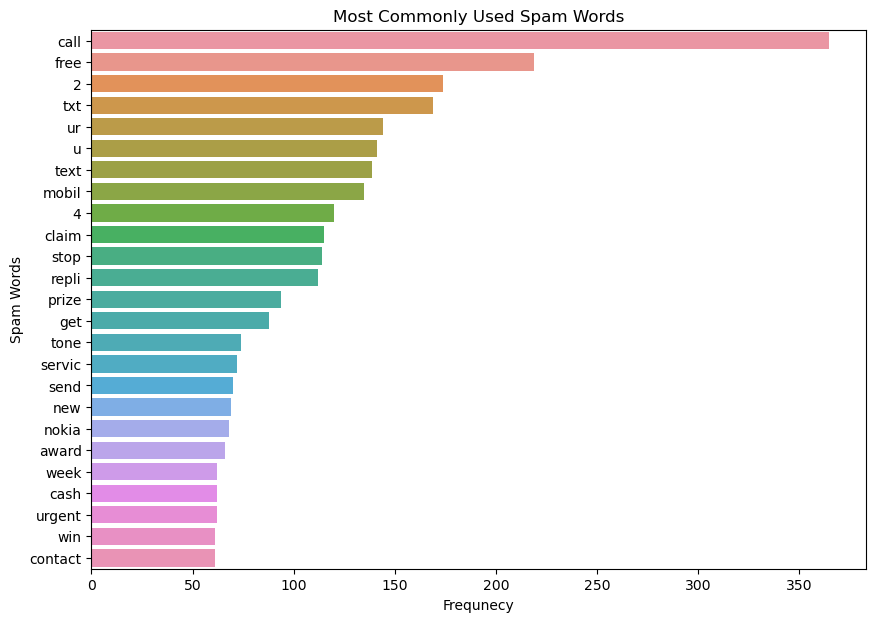

In [53]:
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

### Compare Total No of charactres & words in spam and non spam text  

#### 1. No of Characters in Spam and Ham Text

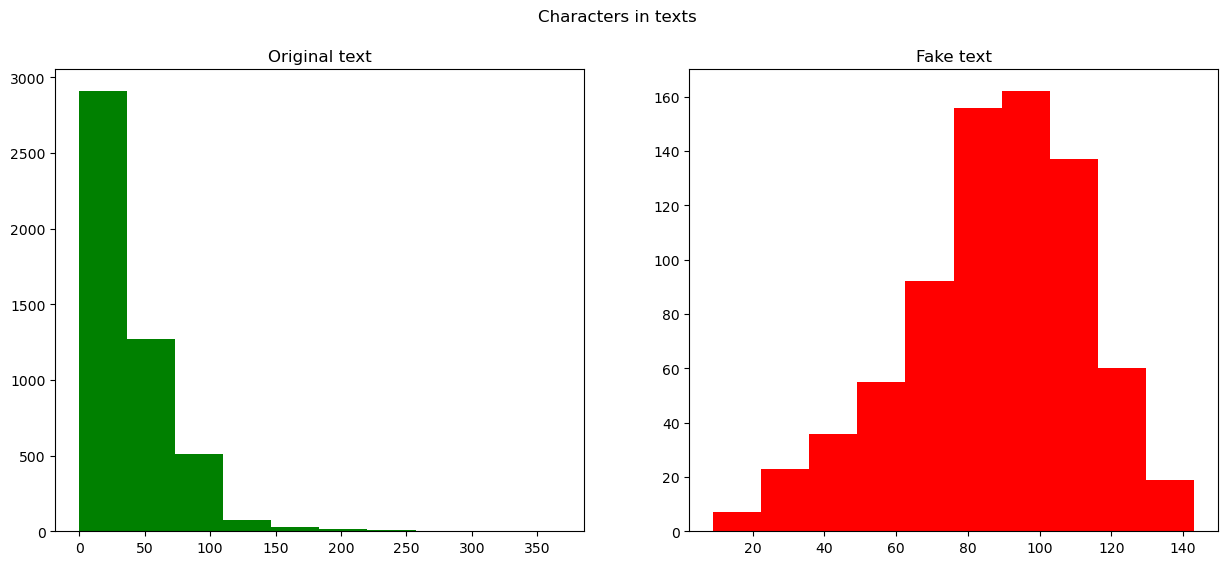

In [54]:
#Characters Visualize
fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (15,6))
text_len = df[df['label'] ==1 ]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len = df[df['label'] == 0]['text'].str.len()
ax2.hist(text_len,color = 'red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

#### 2. No of Words in Spam and Ham Text

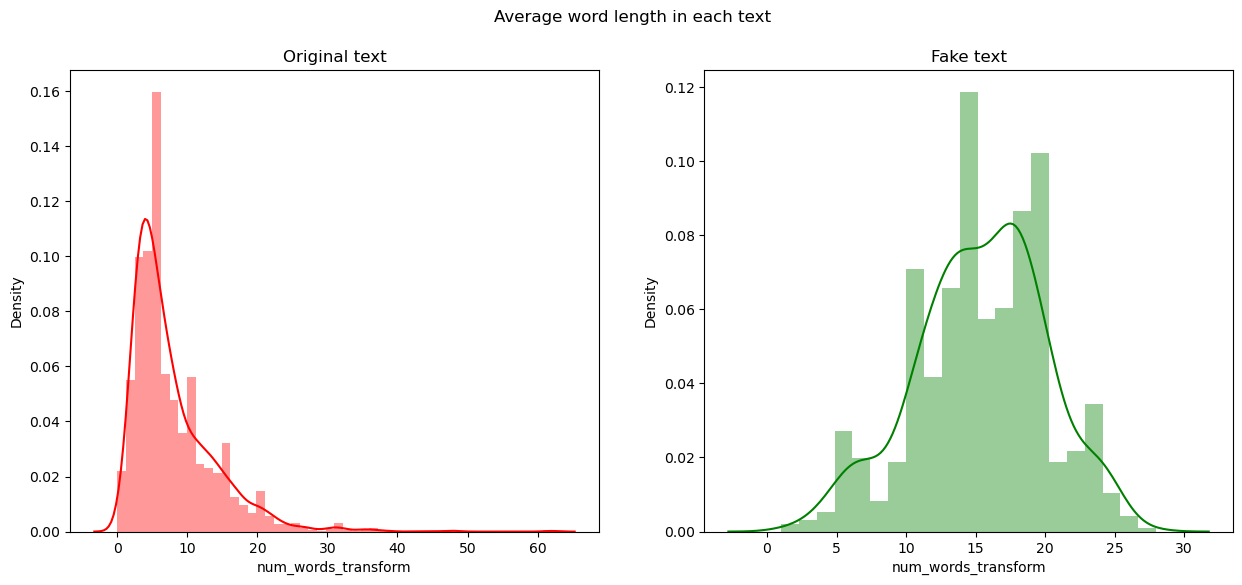

In [55]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15,6))
word = df[df['label'] == 1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax = ax1,color = 'red')
ax1.set_title('Original text')
word = df[df['label'] == 0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax = ax2,color = 'green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text');

### **Conclusion**
  - After visualizing we can conclude that spam text has more words and characters as compare to Ham text
  - Average characters includes in spam message is around 90 characters
  - Average words includes in spam message is around 15 word

<h2>Model Building</h2>

<h3>Text Vectorization (Converting text into numericals (mapping))</h3>

For scikit model to understand the data, we need it in numerical form and not text
So we do the following:
    1. Count how many times does a word occur in each message (Known as term frequency)
    2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
    3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#### Input Output Selection

In [57]:
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [58]:
X.shape

(5566, 3000)

In [59]:
y.shape

(5566,)

<h4>Train Test Split</h4>

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [62]:
X_test.shape[0]

1114

#### Model Training

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [64]:
classifier_array = []
accuracy_array = []
precision_array = []

#### Gaussian Naive Bayes

In [65]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score =", accuracy_score(y_test, y_pred1) * 100, "%")
print("Precision Score =", precision_score(y_test, y_pred1) * 100 , "%")
print(confusion_matrix(y_test, y_pred1))

classifier_array.append("Guassian Naive Bayes")
accuracy_array.append(accuracy_score(y_test, y_pred1) * 100)
precision_array.append(precision_score(y_test, y_pred1) * 100)

Accuracy Score = 84.91921005385996 %
Precision Score = 97.59326113116727 %
[[135  20]
 [148 811]]


<h4>Multinomial Naive Bayes</h4>

In [66]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score =",accuracy_score(y_test,y_pred2)* 100, "%")
print("Precision Score =",precision_score(y_test,y_pred2)* 100, "%")
print(confusion_matrix(y_test,y_pred2))

classifier_array.append("Multinomial Naive Bayes")
accuracy_array.append(accuracy_score(y_test, y_pred2) * 100)
precision_array.append(precision_score(y_test, y_pred2) * 100)

Accuracy Score = 97.93536804308796 %
Precision Score = 97.75510204081633 %
[[133  22]
 [  1 958]]


<h4>Bernoulli Naive Bayes</h4>

In [67]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = gnb.fit(X_train, y_train).predict(X_test)
#print(f"Number of mislabeled points out of a total %d points : %d" (X_test.shape[0], (y_test != y_pred3).sum()))
print("Accuracy Score =",accuracy_score(y_test,y_pred3)* 100, "%")
print("Precision Score =",precision_score(y_test,y_pred3)* 100, "%")
print(confusion_matrix(y_test,y_pred3))


classifier_array.append("Bernoulli Naive Bayes")
accuracy_array.append(accuracy_score(y_test, y_pred3) * 100)
precision_array.append(precision_score(y_test, y_pred3) * 100)

Accuracy Score = 84.91921005385996 %
Precision Score = 97.59326113116727 %
[[135  20]
 [148 811]]


<h4>SVM - Sigmoid Kernel</h4>

In [68]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [69]:
svc_kernels = ['linear', 'poly', "rbf", "sigmoid"] #"precomputed" too, but it needs a squre matrix

for kernel in svc_kernels:
    svc = SVC(kernel = kernel, gamma = 1.0)
    a, p, t = train_classifier(svc, X_train, y_train, X_test, y_test)
    print(f"Kernel - {kernel}")
    print("\tAccuracy Score =", a * 100, "%")
    print("\tPrecision Score =", p * 100, "%")
    print("\tTraining Accuracy =", p * 100, "%")
    
    
    classifier_array.append(kernel)
    accuracy_array.append(a * 100)
    precision_array.append(p * 100)

Kernel - linear
	Accuracy Score = 98.29443447037703 %
	Precision Score = 98.05725971370143 %
	Training Accuracy = 98.05725971370143 %
Kernel - poly
	Accuracy Score = 94.0754039497307 %
	Precision Score = 93.5609756097561 %
	Training Accuracy = 93.5609756097561 %
Kernel - rbf
	Accuracy Score = 97.84560143626571 %
	Precision Score = 97.558494404883 %
	Training Accuracy = 97.558494404883 %
Kernel - sigmoid
	Accuracy Score = 98.02513464991023 %
	Precision Score = 98.05128205128206 %
	Training Accuracy = 98.05128205128206 %


In [70]:
#Training accuracy Returns the mean accuracy on the given test data and labels.

#### Logistic Regression

In [71]:
log_reg = LogisticRegression()
a, p, t = train_classifier(svc,X_train,y_train,X_test,y_test)
print("\tAccuracy Score =", a * 100, "%")
print("\tPrecision Score =", p * 100, "%")
print("\tTraining Accuracy =", p * 100, "%")

classifier_array.append("Logistic Regression")
accuracy_array.append(a * 100)
precision_array.append(p * 100)

	Accuracy Score = 98.02513464991023 %
	Precision Score = 98.05128205128206 %
	Training Accuracy = 98.05128205128206 %


<h2>Comparing All Classifiers</h2>

In [72]:
classifiers={"gnb"         : gnb,
             "mnb"         : mnb,
             "bnb"         : bnb,
             "svm_linear"  : SVC(kernel = 'linear', gamma = 1.0),
             "svm_poly"    : SVC(kernel = 'poly', gamma = 1.0),
             "svm_rbf"     : SVC(kernel = 'rbf', gamma = 1.0),
             "svm_sigmoid" : SVC(kernel = 'sigmoid', gamma = 1.0),
             "log_reg"     : log_reg,
             "d_t": DecisionTreeClassifier(),
             "r_t": RandomForestClassifier(n_estimators=50, random_state=2),
             "mlp" : MLPClassifier()       
            }

In [73]:
#Common Function for model train
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [74]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion Matrix-\n", confusion_matrix(y_test,y_pred))
    print("F1-Score-", f1_score(y_test, y_pred, labels=None, pos_label=1))
    print("Recall-" ,recall_score(y_test, y_pred,labels=None, pos_label=1))
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()


For  gnb
Accuracy -  0.8491921005385996
Precision -  0.9759326113116726
Confusion Matrix-
 [[135  20]
 [148 811]]
F1-Score- 0.906145251396648
Recall- 0.8456725755995829

For  mnb
Accuracy -  0.9793536804308797
Precision -  0.9775510204081632
Confusion Matrix-
 [[133  22]
 [  1 958]]
F1-Score- 0.9881382155750388
Recall- 0.9989572471324296

For  bnb
Accuracy -  0.9829443447037702
Precision -  0.9805725971370143
Confusion Matrix-
 [[136  19]
 [  0 959]]
F1-Score- 0.9901910170366546
Recall- 1.0

For  svm_linear
Accuracy -  0.9829443447037702
Precision -  0.9805725971370143
Confusion Matrix-
 [[136  19]
 [  0 959]]
F1-Score- 0.9901910170366546
Recall- 1.0

For  svm_poly
Accuracy -  0.940754039497307
Precision -  0.935609756097561
Confusion Matrix-
 [[ 89  66]
 [  0 959]]
F1-Score- 0.966733870967742
Recall- 1.0

For  svm_rbf
Accuracy -  0.9784560143626571
Precision -  0.9755849440488301
Confusion Matrix-
 [[131  24]
 [  0 959]]
F1-Score- 0.9876416065911431
Recall- 1.0

For  svm_sigmoid
Accur

In [75]:
accuracy_scores

[0.8491921005385996,
 0.9793536804308797,
 0.9829443447037702,
 0.9829443447037702,
 0.940754039497307,
 0.9784560143626571,
 0.9802513464991023,
 0.9622980251346499,
 0.966786355475763,
 0.9721723518850988,
 0.9820466786355476]

In [76]:
precision_scores

[0.9759326113116726,
 0.9775510204081632,
 0.9805725971370143,
 0.9805725971370143,
 0.935609756097561,
 0.9755849440488301,
 0.9805128205128205,
 0.958958958958959,
 0.9762396694214877,
 0.9715447154471545,
 0.9825282631038027]

In [77]:
train_accuracy_score

[0.8840970350404312,
 0.9827044025157232,
 0.9856244384546271,
 0.9912398921832885,
 0.9995507637017071,
 0.9964061096136568,
 0.9847259658580413,
 0.9705750224618149,
 0.9995507637017071,
 0.9995507637017071,
 0.9995507637017071]

In [78]:
list(classifiers.keys())

['gnb',
 'mnb',
 'bnb',
 'svm_linear',
 'svm_poly',
 'svm_rbf',
 'svm_sigmoid',
 'log_reg',
 'd_t',
 'r_t',
 'mlp']

In [79]:
df1=pd.DataFrame({'Algorithm': list(classifiers.keys()),'Precision':precision_scores,
                  'Test Accuracy':accuracy_scores,'Train Accuracy':train_accuracy_score})#.round(3)

<h2>Sorting The Classifiers in Descending Order Of Accuracy</h2>

In [80]:
df2=df1.sort_values(['Precision','Test Accuracy'],ascending=False)
df2

,Algorithm,Precision,Test Accuracy,Train Accuracy
10,mlp,0.982528,0.982047,0.999551
2,bnb,0.980573,0.982944,0.985624
3,svm_linear,0.980573,0.982944,0.991240
6,svm_sigmoid,0.980513,0.980251,0.984726
1,mnb,0.977551,0.979354,0.982704
8,d_t,0.976240,0.966786,0.999551
0,gnb,0.975933,0.849192,0.884097
5,svm_rbf,0.975585,0.978456,0.996406
9,r_t,0.971545,0.972172,0.999551
7,log_reg,0.958959,0.962298,0.970575


In [81]:
df3 = pd.melt(df2, id_vars = "Algorithm")

In [82]:
df3

,Algorithm,variable,value
0,mlp,Precision,0.982528
1,bnb,Precision,0.980573
2,svm_linear,Precision,0.980573
3,svm_sigmoid,Precision,0.980513
4,mnb,Precision,0.977551
5,d_t,Precision,0.976240
6,gnb,Precision,0.975933
7,svm_rbf,Precision,0.975585
8,r_t,Precision,0.971545
9,log_reg,Precision,0.958959


<h2>Visualizing accuracy of differents models</h2>

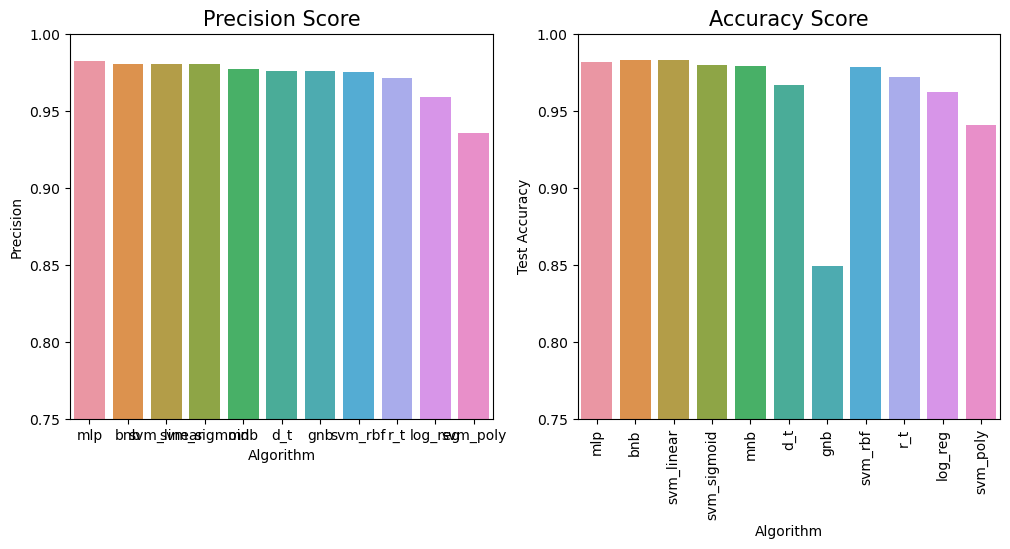

In [83]:
#Visualize accuracy of differents models
#sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x="Algorithm",y="Precision",data=df2)
plt.title("Precision Score",size=15)
plt.ylim(0.75,1.0)
plt.subplot(1,2,2)
sns.barplot(x="Algorithm",y="Test Accuracy",data=df2)
plt.ylim(0.75,1.0)
plt.title("Accuracy Score",size=15)
plt.xticks(rotation='vertical')
plt.show()

<h2>Cross Validation Of TOP 5 Models </h2>

In [84]:
top_classifiers = {
 "mlp" : MLPClassifier(),
 "svm_linear": SVC(kernel='linear', gamma=1.0),
 "bnb" : bnb,
 "svm_sigmoid" : SVC(kernel='sigmoid', gamma=1.0),
 "mnb" : mnb
}

In [85]:
from time import time

<h3>Confusion Matrix, Accuracy, Precision & Process Time</h3>

Classifier :  mlp
Processing Time :  240.329
Mean Accuracy :  0.982
Precision Score :  0.983


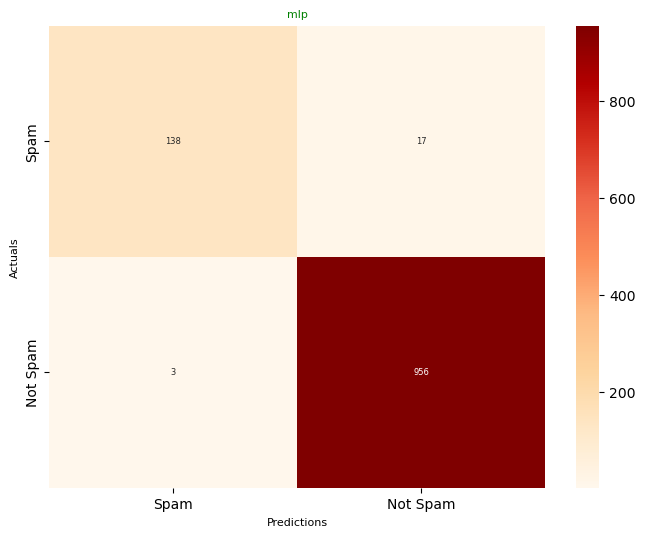

Classifier :  svm_linear
Processing Time :  75.345
Mean Accuracy :  0.981
Precision Score :  0.981


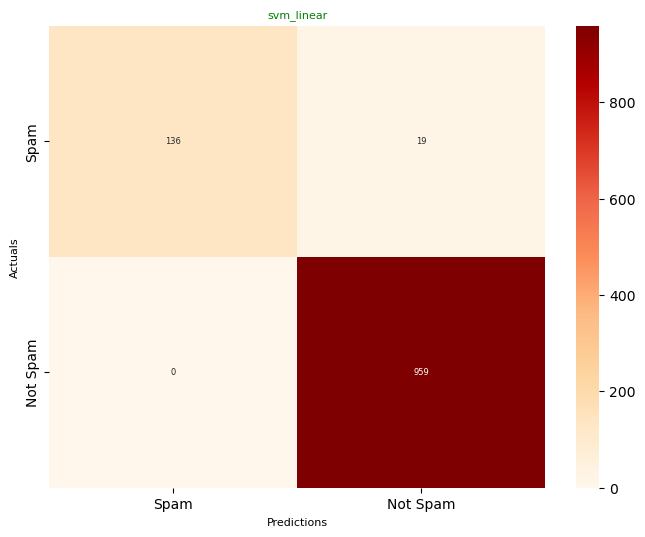

Classifier :  bnb
Processing Time :  1.554
Mean Accuracy :  0.98
Precision Score :  0.981


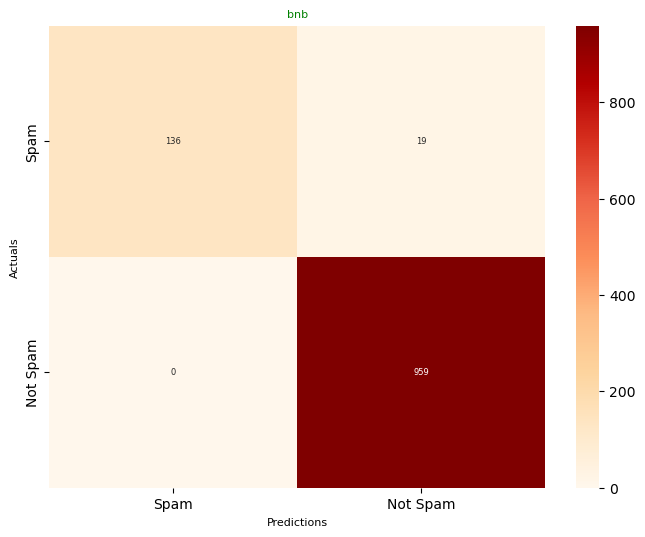

Classifier :  svm_sigmoid
Processing Time :  62.404
Mean Accuracy :  0.978
Precision Score :  0.981


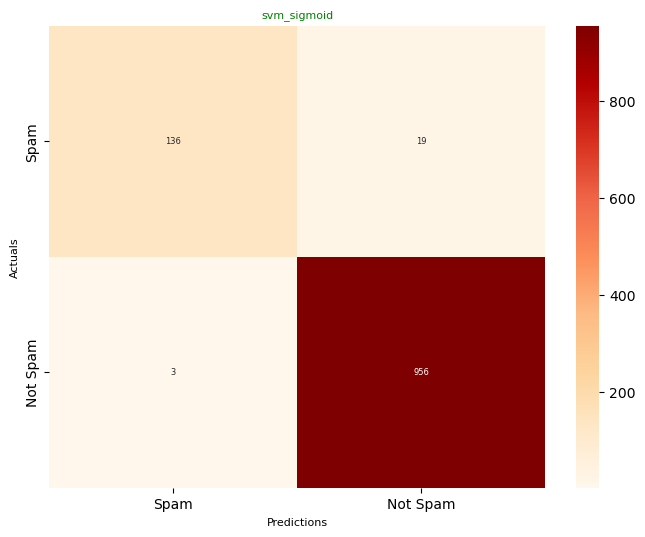

Classifier :  mnb
Processing Time :  0.733
Mean Accuracy :  0.976
Precision Score :  0.978


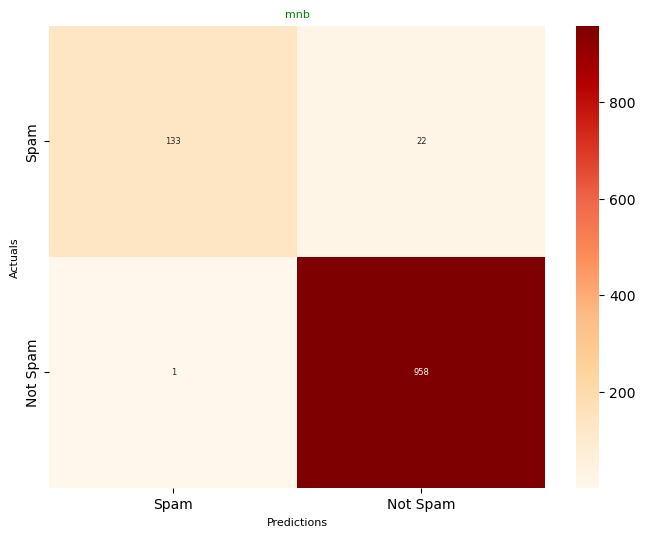

In [89]:
for i,model in top_classifiers.items():
    print("Classifier : ",i)
    t0 = time()
    cv_score=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=10)
    t1 = time()
    tf=t1-t0
    print("Processing Time : ",np.round(tf,3))
    print("Mean Accuracy : ",cv_score.mean().round(3))
    mb=model
    mb.fit(X_train,y_train)
    y_pred = mb.predict(X_test)
    precision = precision_score(y_test,y_pred)
    print("Precision Score : ",np.round(precision,3))
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="OrRd",
                fmt="d",cbar=True,xticklabels=['Spam','Not Spam'],yticklabels=['Spam','Not Spam'],
                annot_kws={"fontsize":6})
    plt.xlabel('Predictions', fontsize=8)
    plt.ylabel('Actuals', fontsize=8)
    plt.title(i,fontsize=8,color='green')
    plt.show()

In [ ]:
#from IPython.core.display import display, HTML

In [ ]:
#display(HTML("<style>.container {height: 10% !important;} </style>"))